[4.47213595499958, 0.29876191619211345, 0.030919823829383377, 0.005459238418016275, 0.001037979687800343, 0.0001974590659537152, 3.74950316547411e-05, 7.113136685056997e-06, 1.3486660248067342e-06]
13.846826470172841


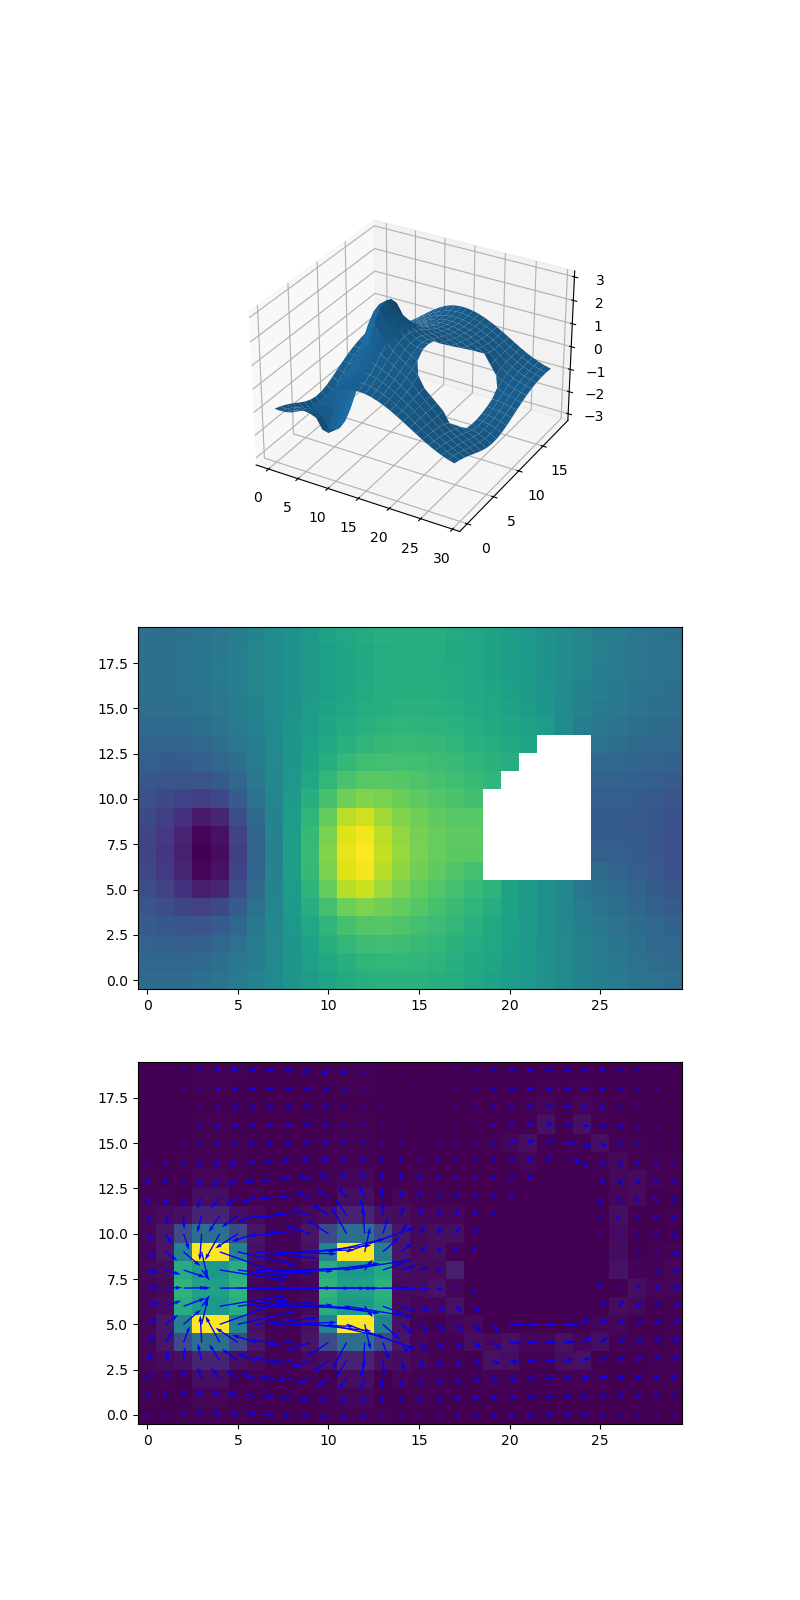

In [39]:
# If constraints for the poisson boundary AND the interior overlap, solution doesn't
# converge.
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

grid = navier_stokes.read_matrix('grids/bullet20x30.txt')
height, width = grid.shape
cells = navier_stokes.cells(grid)
vf = np.zeros(cells.shape + (2,))

vf[5:10, 4:12] = [2, 0]

hd = navier_stokes.HelmholtzDecomposition(cells)

residuals = []
vf, P = hd.solenoidalPart(vf, residuals)
print(residuals)
divfield = np.zeros(cells.shape)
totalDivergence = 0
for fc in cells.flat:
    if isinstance(fc, navier_stokes.ObstacleInteriorCell):
        P[fc.index] = None
        continue
    if not isinstance(fc, navier_stokes.FluidCell):
        continue
    xdiff = (vf[fc.right.index][0] - vf[fc.left.index][0]) / 2
    ydiff = (vf[fc.up.index][1] - vf[fc.down.index][1]) / 2
    divergence = xdiff + ydiff
    divfield[fc.index] = np.abs(divergence)
    totalDivergence += np.abs(divergence)
print(totalDivergence)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.plot_surface(X, Y, P)
ax2.imshow(P, interpolation='none', origin='lower')
ax3.imshow(divfield, interpolation='none', origin='lower')
ax3.quiver(X, Y, vf[:, :, 0], vf[:, :, 1], color="b")

plt.show()